# Programming a Kernel SVM class with second order polynomial K

## basic steps to implement a kernel SVM class


### Define a kernelSVM class

In [120]:
import numpy as np

class PolySVM:
    def __init__(self, C=1, gamma=0.01, eta=0.1, epochs=200, random_state=0):
        self.C = C
        self.gamma = gamma
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state
        
    def poly_kernel(self, X1, X2):
        return (1 + self.gamma * np.dot(X1, X2.T)) ** 2
        
    def fit(self, X, y):
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        rng = np.random.RandomState(self.random_state)
        self.alpha = rng.normal(loc=0, scale=0.01, size=n_samples)

        self.w = np.zeros(n_features)
        K = self.poly_kernel(X, X)
        H = (y @ y.T) * K*(X@X.T)
        for epoch in range(self.epochs):
            g = H @ self.alpha - 1
            self.alpha -= self.eta * g
            self.alpha = np.where(self.alpha < 0, 0, self.alpha)
            self.alpha = np.where(self.alpha > self.C, self.C, self.alpha)
            
        # calculate support vectors
        self.support_vectors_ = X[self.alpha > 0]
        self.support_labels_ = y[self.alpha > 0]
        self.support_alpha_ = self.alpha[self.alpha > 0]
        
        # calculate bias term
        self.b = 0
        n_sv = 0
        for i in range(len(self.alpha)):
            if self.alpha[i] > 0:
                self.b += y[i] - np.sum(self.alpha * y * self.poly_kernel(X[i], X))
                n_sv += 1
        self.b /= n_sv
        
    def predict(self, X):
        K = self.poly_kernel(X, self.support_vectors_)
        return np.sign((self.support_alpha_ * self.support_labels_ * K).sum(axis=1) + self.b)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def decision_function(self,X):
        K = self.poly_kernel(X, self.support_vectors_)
        return ((self.support_alpha_ * self.support_labels_ * K).sum(axis=1) + self.b)
    
    

In the above class, 'gamma' is defined which represents the kernel coefficient for the kernel function. Alpha is a vector of the weights of all the training points as support vectors. Support vectors are the points misclassified by SVM classifier. 

The polynomial kernel is used to map the original feature space into a higher-dimensional space, where it is easier to find a hyperplane that separates the classes.

#### C : controls the trade-off between maximizing the margin and minimizing the classification error. Higher the value --> more accurate classification boundary

#### gamma: controls the width of the kernel. Higher value could cause overfitting and smaller could cause underfitting

#### eta: controls the step size for gradient descent

#### epochs: controls the number of iterations(loop)

### Some Info on methods:
 The fit() method is used to train the model on a given dataset, where it calculates the kernel matrix, constructs the Lagrangian, and uses gradient descent to find the optimal values for the Lagrange multipliers. The predict() method is used to predict the labels of new data points based on the learned parameters, while the score() method is used to evaluate the accuracy of the model on a given dataset. The decision_function() method is used to return the decision function of the classifier.


### Now, we will generate the datasets and test on it whether our polynomial kernel svm works or not

In [121]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X, y= make_circles(n_samples=200, noise=0.04, factor=0.6, random_state=0)
y
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

We imported the dataset and split into two data sets, training and testing, using train_test_split

### Plot the original dataset

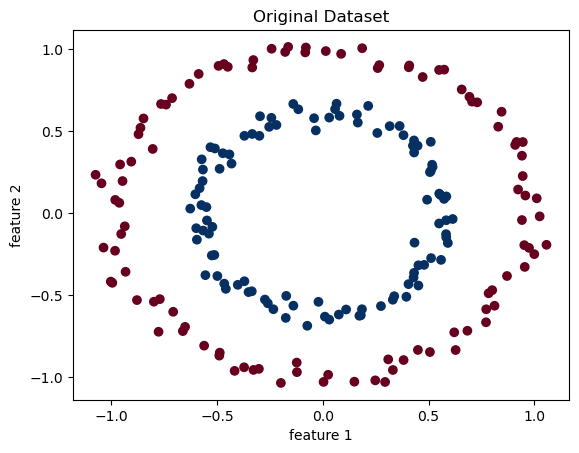

In [122]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdBu)
plt.title("Original Dataset")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

### Transform dataset using second order polynomial kernel

In [123]:
svm = PolySVM()
svm.fit(X_train,y_train)
print(f'Using predict(), the predictions for testing dataset are:{svm.predict(X_test)}')
print(f"The accuracy of our model using poly kernel degree 2 is: {svm.score(X_test, y_test):.2f} or {svm.score(X_test, y_test)*100:.2f}%")

Using predict(), the predictions for testing dataset are:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
The accuracy of our model using poly kernel degree 2 is: 0.47 or 46.67%


We have called the default PolySVM class, meaning we have not changed any parameters for training the dataset. Our model has the accuracy of ~47%. It is not the best model, but we can consider a good model. Having less accuracy, below 50% means the model is not able to classify the data points correctly in almost half of the cases.
   #### Reasons for low accuracy:
      Hyperparameters and our dataset being non-linear

### print the evaluation results

In [124]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,svm.predict(X_test)))
print(classification_report(y_test, svm.predict(X_test)))

[[ 0 32]
 [ 0 28]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.47      1.00      0.64        28

    accuracy                           0.47        60
   macro avg       0.23      0.50      0.32        60
weighted avg       0.22      0.47      0.30        60



C:\Users\khadk\anaconda3\envs\machineLearning_Spring_2023\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khadk\anaconda3\envs\machineLearning_Spring_2023\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khadk\anaconda3\envs\machineLearning_Spring_2023\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

### plot the transformed data and visually see the difference

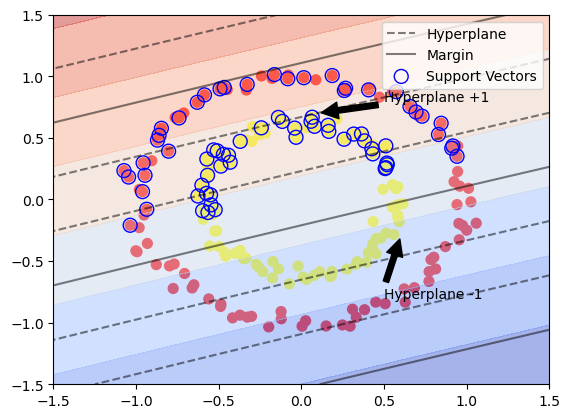

In [125]:
#define the range of the plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

#predict the levels of the mesh grid points
Z = svm.decision_function(xy).reshape(XX.shape)

# set levels to be within the range of Z
levels = np.linspace(np.min(Z), np.max(Z), 10)
ax.contour(XX, YY, Z, colors='k', levels=levels, alpha=0.5,
           linestyles=['--', '-', '--'])
plt.contourf(XX, YY, Z, alpha=0.5, cmap='coolwarm')

# plot support vectors
sv =plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='b', label='Support Vectors')

#mark/annotate the place where hyperplanes are located
plt.annotate('Hyperplane +1', xy=(0.1, 0.7), xytext=(0.5, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Hyperplane -1', xy=(0.6, -0.3), xytext=(0.5, -0.8),
             arrowprops=dict(facecolor='black', shrink=0.05))

# add legend
legend_handles = [plt.Line2D([], [], linestyle='--', color='k', alpha=0.5, label='Hyperplane'),
                  plt.Line2D([], [], linestyle='-', color='k', alpha=0.5, label='Margin'), sv]

plt.legend(handles=legend_handles, loc='best')

plt.show()





Two sets of data points are classified and separated by hyperplanes. Support vectors are highlighted and decision boundary line is plotted along with hyperlanes. Color bg is also used to show the hyperplanes and marginal lines. 

### Adjusting the values of gamma and C make our plotting more interesting, lets do that

The goal of svm is to find the best boundary that separates the sets of points. The boundary line maximizes the distance between the points in the line to other points. Since the points above are two dimensional, the svm calculates hyperplanes. 

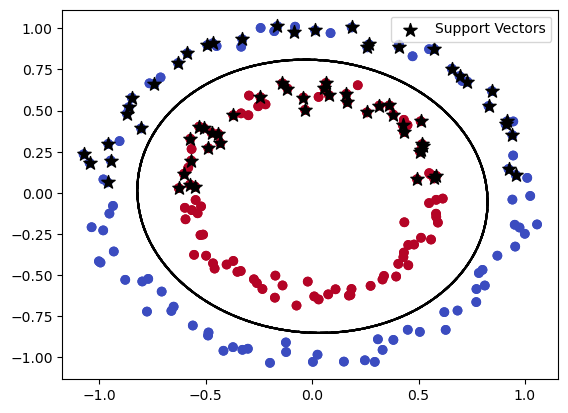

In [126]:
# Define the SVM classifier with a second-order polynomial kernel
clf = PolySVM(C=100, gamma=100, random_state=0)
# Fit the classifier to the data
clf.fit(X_train, y_train)
# Define the range of the plot
xmin, xmax = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
ymin, ymax = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 200), np.linspace(ymin, ymax, 200))

# Predict the labels of the mesh grid points
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary, margin line, and hyperplanes
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)# Plot the decision boundary, margin line, and hyperplanes
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])
plt.contour(xx, yy, Z + 1, levels=[0], colors='k', linestyles=['-'])
plt.contour(xx, yy, Z - 1, levels=[0], colors='k', linestyles=['-'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Plot the support vectors
sv = clf.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], c='k', marker='*', s=100, linewidth=1, edgecolors='k', label="Support Vectors")

# Add legend
plt.legend()

# Show the plot
plt.show()


We can see that our decision boundary line now is more circular and support vectors are in and out of the boundary line. This is because we changed/increased the value of gamma and C. We can see increasing the value of gamma has led us to the overfitting dataset. 

## Comparing the above graph and accuracy with using svm of the sklearn library

0.9833333333333333


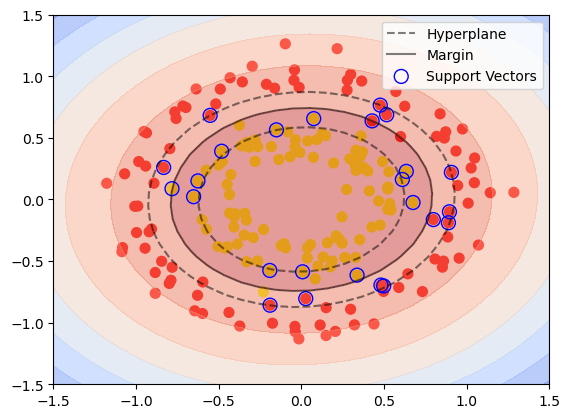

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=200, noise=0.1, factor=0.5)

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = SVC(kernel='poly', degree=2)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.contourf(XX, YY, Z, alpha=0.5, cmap='coolwarm')

# plot support vectors
sv =plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='b', label='Support Vectors')

# add legend
legend_handles = [plt.Line2D([], [], linestyle='--', color='k', alpha=0.5, label='Hyperplane'),
                  plt.Line2D([], [], linestyle='-', color='k', alpha=0.5, label='Margin'), sv]

plt.legend(handles=legend_handles, loc='best')

plt.show()


Using default svm of the scikit library with kernel='poly', we get more detailed graph. Hyperplanes are indicated by -- lines and marginal line is indicated by -. There are few support vectors than in the model we created. Our accuracy of the model is almost 100%. 